**Importing Correct Files/Features**

Below shows importing the expected libraries and then the data files. 

Data files are merged on the 'SEQN' number (basically a unique identifier for each individual that took part)

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_dir_1 = '/workspaces/Final-Year-Project/Data/2023/'

nhanes_files_variables = {
    'BMX_L.XPT': ['SEQN', 'BMXWAIST', 'BMXWT', 'BMXBMI', 'BMXARMC', 'BMXHIP'],
    'BPQ_L.XPT': ['SEQN', 'BPQ150', 'BPQ101D', 'BPQ020', 'BPQ080'],
    'FNQ_L.XPT': ['SEQN', 'FNQ440'],
    'HUQ_L.XPT': ['SEQN', 'HUQ010'],
    'MCQ_L.XPT': ['SEQN', 'MCQ160A'],
    'PAQ_L.XPT': ['SEQN', 'PAD810Q'],
    'SMQ_L.XPT': ['SEQN', 'SMD630', 'SMD641'],
    'WHQ_L.XPT': ['SEQN', 'WHD020', 'WHD050'],
    'DEMO_L.XPT': ['SEQN', 'DMDYRUSR', 'RIDAGEYR'],
    'GHB_L.XPT': ['SEQN', 'LBXGH'],
    'GLU_L.xpt': ['SEQN', 'LBXGLU'],
    'RXQ_RX_L.XPT': ['SEQN', 'RXQ050'],
    'OHQ_L.XPT': ['SEQN', 'OHQ845'],
    'RXQASA_L.XPT': ['SEQN', 'RXQ510']
}

data_frames = {}

for file_name, features in nhanes_files_variables.items():

    file_path = data_dir_1 + file_name
    
    df = pd.read_sas(file_path)
    
    df = df[features]
    
    data_frames[file_name] = df

merged_df = data_frames['BMX_L.XPT']

for file_name, df in data_frames.items():
    if file_name != 'BMX_L.XPT':
        merged_df = pd.merge(merged_df, df, on='SEQN', how='outer')

# Display info
print(merged_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      11933 non-null  float64
 1   BMXWAIST  8190 non-null   float64
 2   BMXWT     8754 non-null   float64
 3   BMXBMI    8471 non-null   float64
 4   BMXARMC   8562 non-null   float64
 5   BMXHIP    6776 non-null   float64
 6   BPQ150    2969 non-null   float64
 7   BPQ101D   8498 non-null   float64
 8   BPQ020    8498 non-null   float64
 9   BPQ080    8498 non-null   float64
 10  FNQ440    8142 non-null   float64
 11  HUQ010    11933 non-null  float64
 12  MCQ160A   7807 non-null   float64
 13  PAD810Q   8139 non-null   float64
 14  SMD630    23 non-null     float64
 15  SMD641    273 non-null    float64
 16  WHD020    8486 non-null   float64
 17  WHD050    8486 non-null   float64
 18  DMDYRUSR  1875 non-null   float64
 19  RIDAGEYR  11933 non-null  float64
 20  LBXGH     6715 non-null   fl

In [377]:
merged_df_cleaned = merged_df.dropna(subset=['LBXGH', 'LBXGLU'], how='all')

def categorize_diabetes(row):
    if (pd.notnull(row['LBXGH']) and row['LBXGH'] >= 6.5) or (pd.notnull(row['LBXGLU']) and row['LBXGLU'] >= 126):
        return 2
    
    elif (pd.notnull(row['LBXGH']) and 5.7 <= row['LBXGH'] < 6.5) or (pd.notnull(row['LBXGLU']) and 100 <= row['LBXGLU'] < 126):
        return 1
    else:
        return 0

merged_df_cleaned['Diabetes Status'] = merged_df_cleaned.apply(categorize_diabetes, axis=1)

merged_df_cleaned = merged_df_cleaned.drop(columns=['LBXGH', 'LBXGLU'])

df = merged_df_cleaned
df.info()

print(df.head())



<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 11932
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEQN             6717 non-null   float64
 1   BMXWAIST         6418 non-null   float64
 2   BMXWT            6640 non-null   float64
 3   BMXBMI           6626 non-null   float64
 4   BMXARMC          6548 non-null   float64
 5   BMXHIP           6364 non-null   float64
 6   BPQ150           2214 non-null   float64
 7   BPQ101D          6243 non-null   float64
 8   BPQ020           6243 non-null   float64
 9   BPQ080           6243 non-null   float64
 10  FNQ440           6002 non-null   float64
 11  HUQ010           6717 non-null   float64
 12  MCQ160A          5768 non-null   float64
 13  PAD810Q          5997 non-null   float64
 14  SMD630           22 non-null     float64
 15  SMD641           199 non-null    float64
 16  WHD020           6243 non-null   float64
 17  WHD050           6

/tmp/ipykernel_4110/1091130225.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned['Diabetes Status'] = merged_df_cleaned.apply(categorize_diabetes, axis=1)


In [378]:
df = df.dropna(subset=['Diabetes Status'])

missing_percentage = df.isnull().mean() * 100

columns_to_drop = missing_percentage[missing_percentage > 10].index

df = df.drop(columns=columns_to_drop)

df = df.dropna()

df.info()





<class 'pandas.core.frame.DataFrame'>
Index: 5875 entries, 0 to 11932
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEQN             5875 non-null   float64
 1   BMXWAIST         5875 non-null   float64
 2   BMXWT            5875 non-null   float64
 3   BMXBMI           5875 non-null   float64
 4   BMXARMC          5875 non-null   float64
 5   BMXHIP           5875 non-null   float64
 6   BPQ101D          5875 non-null   float64
 7   BPQ020           5875 non-null   float64
 8   BPQ080           5875 non-null   float64
 9   HUQ010           5875 non-null   float64
 10  WHD020           5875 non-null   float64
 11  WHD050           5875 non-null   float64
 12  RIDAGEYR         5875 non-null   float64
 13  OHQ845           5875 non-null   float64
 14  Diabetes Status  5875 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 734.4 KB


In [379]:
df['Diabetes Status'].value_counts()

Diabetes Status
0    2918
1    2197
2     760
Name: count, dtype: int64

<Axes: >

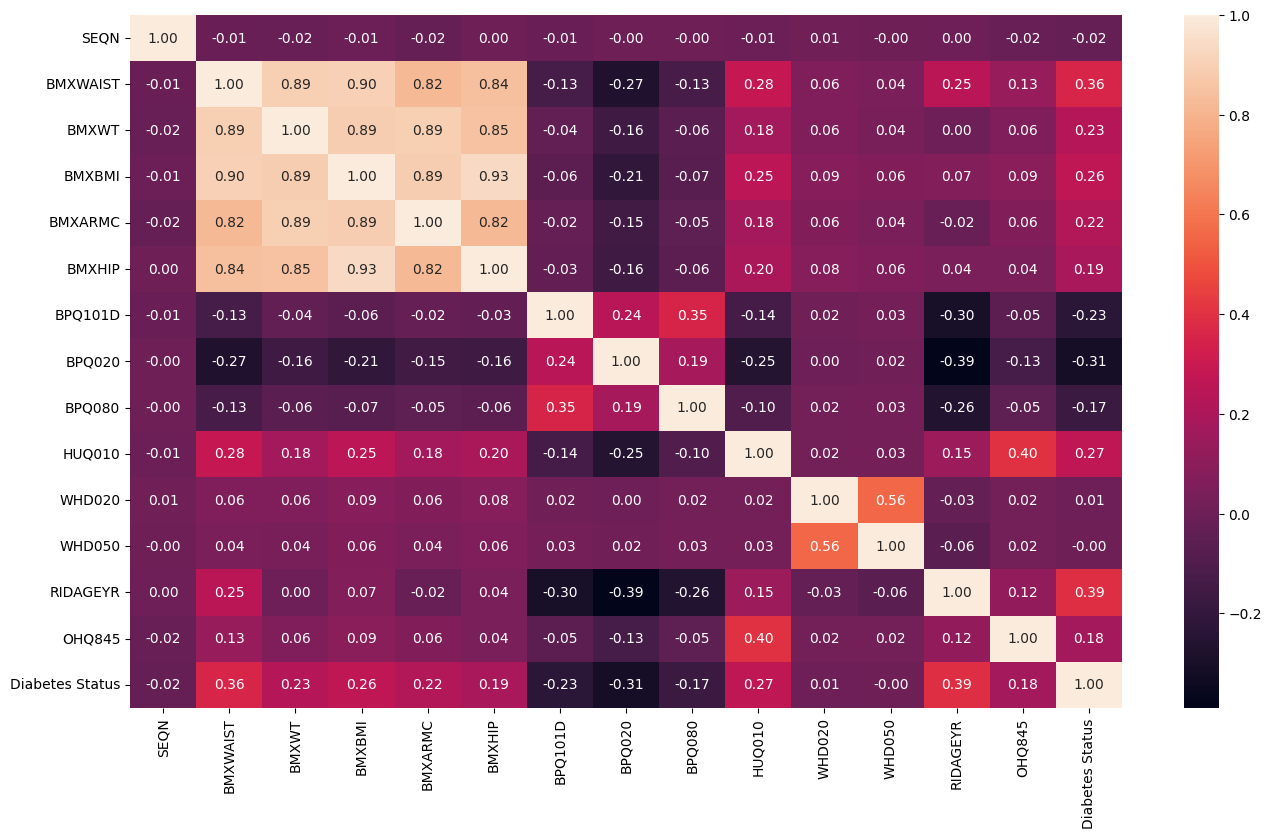

In [380]:


plt.figure(figsize=(16, 9))

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

In [381]:
df_corr = df.corr() 
df_top = df_corr['Diabetes Status'].abs().sort_values(ascending=False)

df_top

Diabetes Status    1.000000
RIDAGEYR           0.391195
BMXWAIST           0.357004
BPQ020             0.311899
HUQ010             0.266821
BMXBMI             0.263196
BPQ101D            0.233561
BMXWT              0.226993
BMXARMC            0.220089
BMXHIP             0.190924
OHQ845             0.178217
BPQ080             0.172720
SEQN               0.022494
WHD020             0.006324
WHD050             0.001907
Name: Diabetes Status, dtype: float64

In [382]:
selected_columns = df_top[df_top.abs() > 0.20].index 

df_filtered = df_top[selected_columns]

In [384]:
from sklearn.utils import resample

no_diabetes = df[df['Diabetes Status'] == 0]
prediabetes = df[df['Diabetes Status'] == 1]
diabetes = df[df['Diabetes Status'] == 2]

minority_class_size = len(diabetes)

no_diabetes_downsampled = resample(no_diabetes, replace=False, n_samples=minority_class_size, random_state=42)
prediabetes_downsampled = resample(prediabetes, replace=False, n_samples=minority_class_size, random_state=42)

df_balanced = pd.concat([no_diabetes_downsampled, prediabetes_downsampled, diabetes])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [385]:
df_balanced['Diabetes Status'].value_counts()  

Diabetes Status
0    760
2    760
1    760
Name: count, dtype: int64

In [386]:
from sklearn.model_selection import train_test_split

df_train_test, df_validate = train_test_split(df_balanced, test_size=0.1, random_state=42)

df_validate.to_csv('/workspaces/Final-Year-Project/Cleaned Data/ValidationData.csv', index=False)

df_train_test.to_csv('/workspaces/Final-Year-Project/Cleaned Data/TrainTestData.csv', index=False)